# K-MEANS Clustering Project-Customer Segmentation.

### Contents.

1. Introduction to the project.
    1. Business Value Of the project
1. Importing Libraries.
1. Loading Data
1. Data Overview
    1. Data Shape
    1. Variables names
    1. Data Structure
    1. Data Summary
1. Exploratory Data Analysis
    1. Univariate Analysis
        1. Distribution of continuous Variables.
        1. Distribution of categorical variables.
1. Bivariate Analysis.
    1. Relationship betwen continuous variables.
1. Data Preprocessing.
1. K-Means Cluster Creation
    1. Insigts
    1. Chosing the best K value
1. Conclusion
    
# Introduction to the project.

Customer segmentation is the process of partitioning the customer base into groups of individuals who share similar characteristics.In this project I am going to look into application of K-means clustering algorithm to group customers based on some of their attributes.

## Business Value of this project.

Imagine you have own a gym where you issue your clients with membership cards.Over time you have collected data on your customers and you would like to use this information to partition your customers so that you can make targeted advertisements and offers based on a particular group.The groups can be **low risk** or **high risk** customer group,ie those that are more likely to pay for your services or those that may not purchase your services respectively.

For this project we are dealing with a supermarket data where we want to learn customer segments based on their previous activities.
Your main business task is to retain as many customers as possible. 

# Importing libraries

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data

In [192]:
df = pd.read_csv("Mall_Customers.csv")

# Data Overview

Lets look into the data and see some quick characteristics about the data.
## Data shape

In [193]:
print("Observations:" ,df.shape[0],"\n","Variables:",df.shape[1])

Observations: 200 
 Variables: 5


## Variables

In [194]:
#simillar to names(df) in r
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Data Structure

In [195]:
#similar to dplyr::glimpse(df) in R
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [196]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


W e can see that the dataset has no missing value in any of the variables.Apart from gender which is stored as a categorical variable in string format ,the remaining variables are all made up of integers.

## Exploratory Data Analysis

In this section i will perform quick descriptives to see some quick information per variable.

### Univariate Analysis.

#### Distribution of the continuous variables.

/Users/admin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


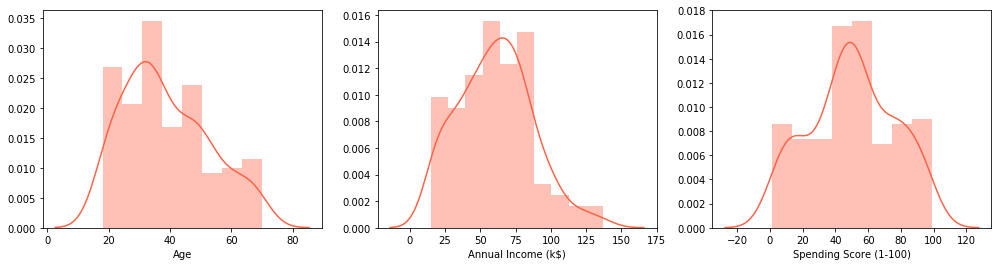

In [197]:
contVars=df.drop(['CustomerID','Gender'],axis=1)
fig,axes = plt.subplots(1,3,figsize = (17,4))
sns.distplot(contVars['Age'],ax = axes[0],color="Tomato")
sns.distplot(contVars['Annual Income (k$)'],ax = axes[1],color="Tomato")
sns.distplot(contVars['Spending Score (1-100)'],ax = axes[2],color="Tomato")
plt.show()

**Observation and Inference**
    - Age and anual income looks to slightly follow a gaussian distribution.
    - Age looks a bit skewed.

#### Distribution of the Categorical variable.

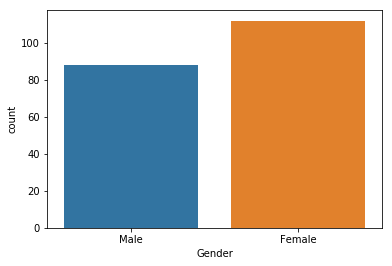

In [198]:
sns.countplot('Gender',data=df)
plt.show()

**Observation and inference.**
    - It is evident that there are more females registeres in the mall

### Bivariate analysis.

#### Relationship between the variables.

In [199]:
contVars.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


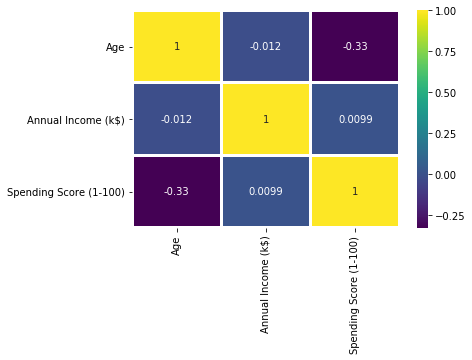

In [200]:
sns.heatmap(contVars.corr(),annot=True,lw=2,cmap="viridis")
plt.show()

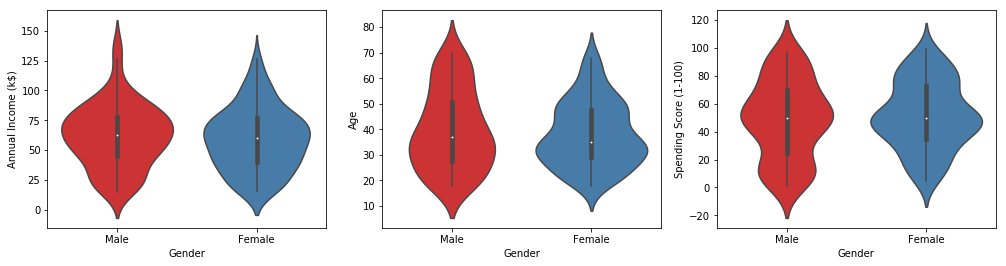

In [201]:
fig,axes = plt.subplots(1,3,figsize = (17,4))
# violin plots
sns.violinplot(x="Gender", y="Annual Income (k$)", data=df,split=True,palette='Set1',ax=axes[0])
sns.violinplot(x="Gender", y="Age", data=df,split=True,palette='Set1',ax=axes[1])
sns.violinplot(x="Gender", y="Spending Score (1-100)", data=df,split=True,palette='Set1',ax=axes[2])
plt.show()

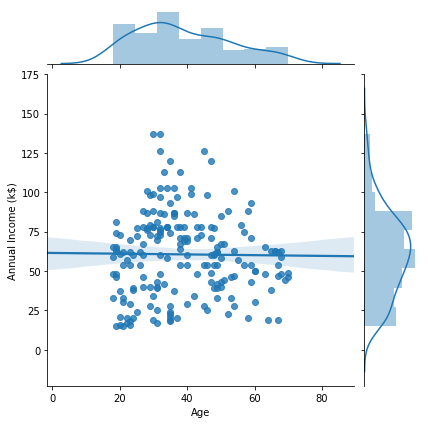

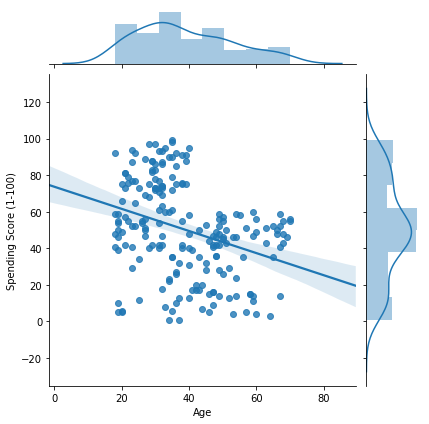

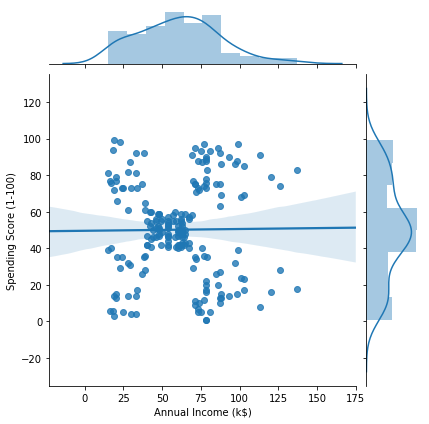

In [202]:

# pairplots
sns.jointplot(x="Age",y="Annual Income (k$)",data=df,kind="reg")
sns.jointplot(x="Age",y="Spending Score (1-100)",data=df,kind="reg")
sns.jointplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df,kind="reg")
plt.show()

**Observations and inference**
    - We can see that age and spending score are negatively correlates related same to age and annual income.
    
## Data Pre-procesing.
We see that gender is categorical variable and k-means uses euclidian distance in calculating the distance between points,therefore we will drop it.Also in order to get accurate Euclidian distances ,its a good practice to scale the datapoints.

In [203]:
#dropping the gender variable
df.drop(['Gender','CustomerID'],axis=1,inplace=True)

In [204]:
#scalling the datapoints.
from sklearn.preprocessing import StandardScaler

In [205]:
scaler = StandardScaler()

In [209]:
scaler.fit(df)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [210]:
scaled_features = scaler.transform(df)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [213]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns)


    
# K-Means Cluster Creation.

Its time to model.In this model i will start with 3 clusters.

In [214]:
from sklearn.cluster import KMeans

In [215]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12,random_state=0)

In [218]:
k_means.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [219]:
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 1 2 2 2 1 1 1 1 2 1 0 0 2 0 1 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0]


## Insights.

Lets see the insights brought about by the model.First i will asign each row to a label.

In [220]:
df['Cluster'] = labels

### 1. Centroid Values

I will do this by averaging the values within each centroid.

In [221]:
df.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.853659,87.341463,79.975610
1,50.406250,60.468750,33.343750
2,25.142857,43.269841,56.507937


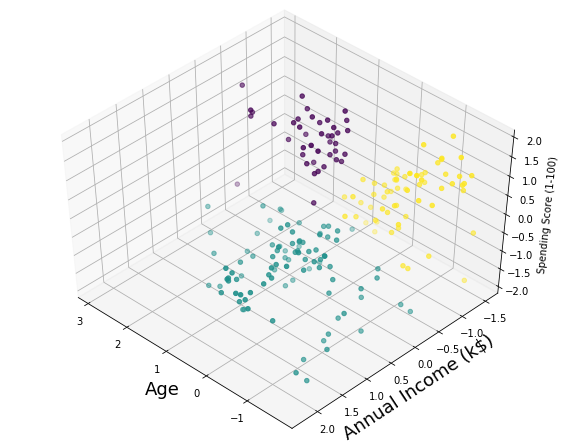

In [222]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plt.ylabel('Age', fontsize=18)
plt.xlabel('Income', fontsize=18)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

ax.scatter(scaled_features[:, 1], scaled_features[:, 0], scaled_features[:, 2], c= labels.astype(np.float))
plt.show()

# Choosing the best value of k

Geting the "best" value of K is always a challenge in real life.The best proposed way is by using the elbow method.In this case we take the values of a metric and plot against the k values and choose where the plot shifts abruply having the shape of an elbow.

Lets see this.
0703285990

### Segmenting based on all the featues

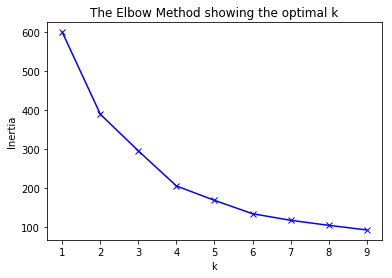

In [289]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init = "k-means++", n_init = 20,max_iter=300,tol=0.0001,algorithm="elkan").fit(scaled_features)
#     kmeanModel.fit(scaled_features)
    inertia.append(kmeanModel.inertia_)

# Ploting the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Observation and inference**
    - At this point we can see that the 4 is the best value for k.
    - We can therefore conclude that our customers can be segmented into 3 categories.

## Segmenting based on age and income only

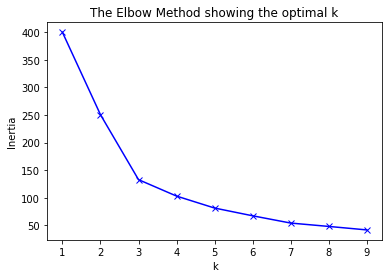

In [253]:
inertia2 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init = "k-means++", n_init = 20,max_iter=300,tol=0.0001,algorithm="elkan").fit(scaled_features)
    kmeanModel.fit(pd.DataFrame(scaled_features)[[0,1]].values)
    inertia2.append(kmeanModel.inertia_)

# Ploting the elbow
plt.plot(K, inertia2, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based age and income only ,it is visibly clear that 3 is the best value for K.

# Segmenting based on age only.

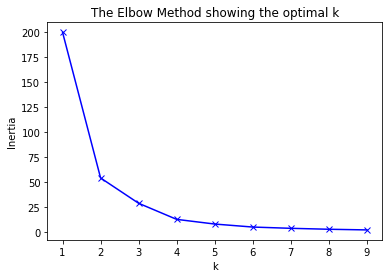

In [255]:
inertia3 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init = "k-means++", n_init = 20,max_iter=300,tol=0.0001,algorithm="elkan").fit(scaled_features)
    kmeanModel.fit(pd.DataFrame(scaled_features)[[0]].values)
    inertia3.append(kmeanModel.inertia_)

# Ploting the elbow
plt.plot(K, inertia3, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

When using age only the best value for k will be 2 as the elbow plot above suggests.

## Segmenting based on Income and spending score.

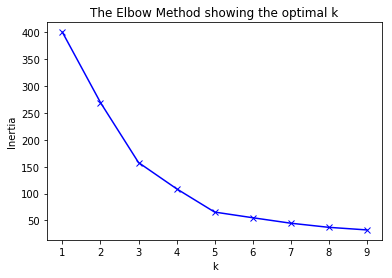

In [265]:
inertia4 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init = "k-means++", n_init = 20,max_iter=300,tol=0.0001,algorithm="elkan").fit(scaled_features)
    kmeanModel.fit(pd.DataFrame(scaled_features)[[1,2]].values)
    inertia4.append(kmeanModel.inertia_)

# Ploting the elbow
plt.plot(K, inertia4, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Conclusion

Based on income and spending score we see that 3 is the best k value.

All in all the best k value should involve all the variables.

In this project the 3 clusters could be defined as:
    - AFFLUENT, EDUCATED AND OLD AGED
    - MIDDLE AGED AND MIDDLE INCOME
    - YOUNG AND LOW INCOME
    
___
## THE END
___